# ARIMA and Seasonal ARIMA
## Auto Regressive Integrated Moving Averages
The general precess for ARIMA models is as follows:
* Visualize the Timeseries data
* Make the time series data stationary
* Plot the Correlation and Autocorrelation charts
* Construct the ARIMA model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps

## Importing the dataset and required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

od.download('https://www.kaggle.com/galibce003/perrin-freres-monthly-champagne-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venupodugu
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 407kB/s]

In [3]:
df = pd.read_csv('./perrin-freres-monthly-champagne-sales/Perrin Freres monthly champagne sales millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


## Cleaning up the data

In [6]:
# Changing the column names

df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [12]:
# Dropping the rows with nan values

df.drop(106, inplace=True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [13]:
df.drop(105, inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [14]:
# Converting 'Month' into datetime format

df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
# Setting the 'Month' feature as index

df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize the data

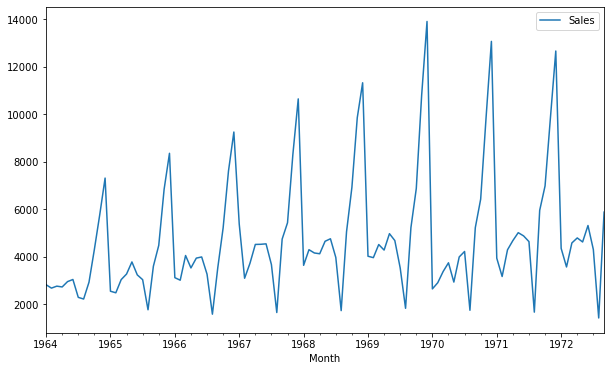

In [18]:
plt.rcParams['figure.figsize'] = 10,6
df.plot()

In [19]:
# Checking for Stationarity

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Sales'])

In [30]:
# Null hypothesis H0: Data is non-stationary 
# Alternate hypothesis H1: Data is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', '#Lags used', '#Observations used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Week evidance against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [32]:
adfuller_test(df['Sales'])

ADF test statistic : -1.8335930563276246
p-value : 0.3639157716602442
#Lags used : 11
#Observations used : 93
Week evidance against null hypothesis, time series has a unit root, indicating it is non-stationary


## Differencing - Making the timeseries data stationary

In [33]:
df['Sales'].shift(1).head()

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
Name: Sales, dtype: float64

In [34]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [35]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [36]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [37]:
# Again test Dickey-Fuller test

adfuller_test(df['Seasonal First Difference'].dropna())

ADF test statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags used : 0
#Observations used : 92
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


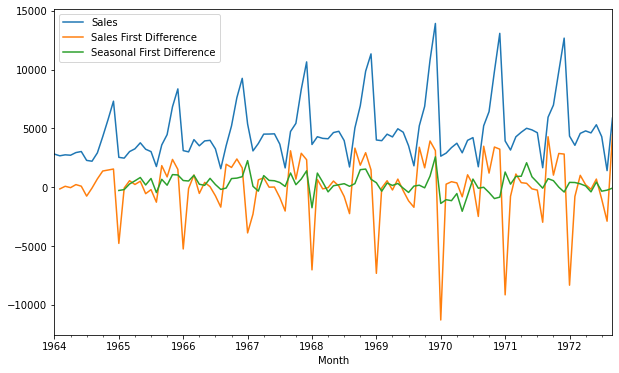

In [38]:
df.plot()

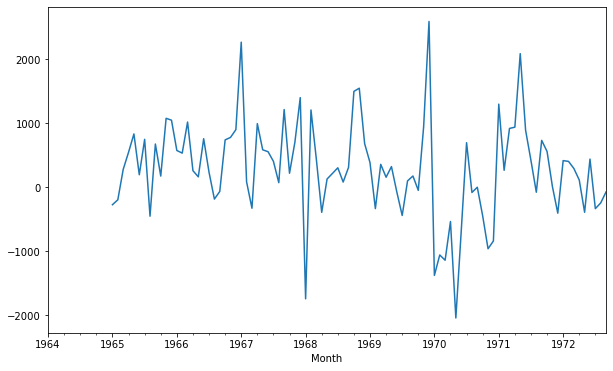

In [39]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

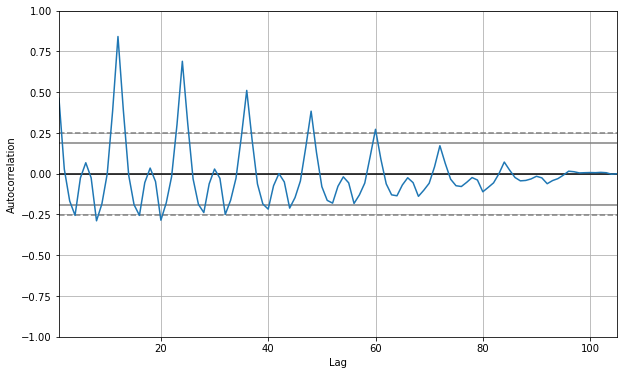

In [41]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()

## Final thoughts on Autocorrelation and Partial Autocorrelation
1. Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF 'shuts off' past the order of the model. The phrase 'shuts off' means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the 'order of the model' we mean the most extreme lag of x that is used as a predictor.
    
2. Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instesd tapers toward 0 in some manner. A clearer pattern for a MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

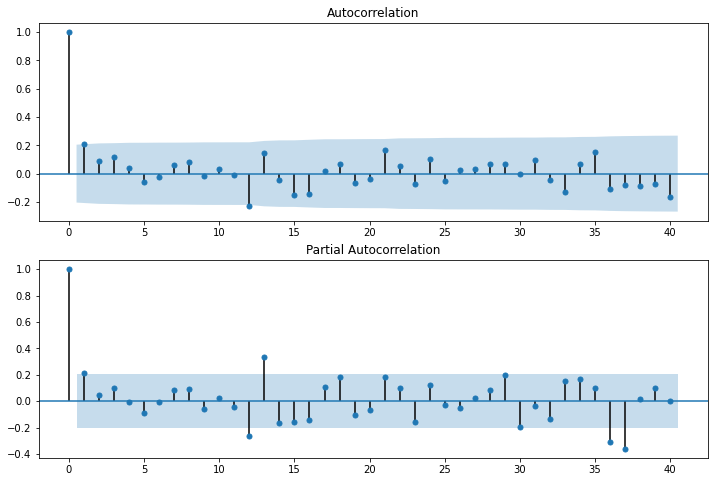

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [52]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df['Seasonal First Difference'].dropna(), nlags=20)
lag_pacf = pacf(df['Seasonal First Difference'].dropna(), nlags=20, method='ols')

C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


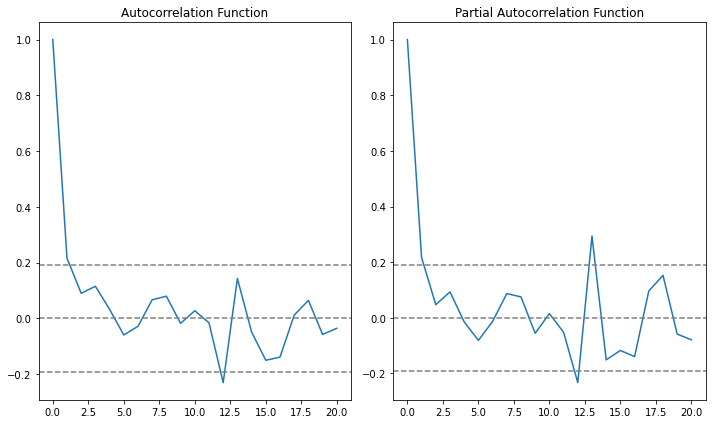

In [54]:
# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['Seasonal First Difference'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['Seasonal First Difference'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['Seasonal First Difference'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['Seasonal First Difference'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above, we can define the values of P & Q as the value on the x-axis where there graph touches the origin for the first time. P & Q values are approximately equal to 4.

Now, we know the values of P,D and Q: P=4, D=1, Q=4.

## Constructing the ARIMA model

In [55]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Sales'], order=(4,1,4))
model_fit = model.fit()

C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -928.205
Method:                       css-mle   S.D. of innovations           1722.561
Date:                Thu, 28 Jan 2021   AIC                           1876.409
Time:                        13:28:31   BIC                           1902.853
Sample:                    02-01-1964   HQIC                          1887.122
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.8088      7.902      3.013      0.003       8.321      39.297
ar.L1.D.Sales     0.3654      0.156      2.336      0.019       0.059       0.672
ar.L2.D.Sales    -0.4069      0.131     -3.106      0.002      -0.664      -0.150
ar.L3.D.Sales    -0.5223      0.148     -3.537      0.000      -0.812      -0.233
ar.L4.D.Sales    -0.0451      0.160     -0.282      0.778      -0.358       0.268
ma.L1.D.Sales    -0.9076      0.130     -6.986      0.000      -1.162      -0.653
ma.L2.D.Sales     0.2569      0.118      2.172      0.030       0.025       0.489
ma.L3.D.Sales     0.5048      0.176      2.866      0.004       0.160       0.850
ma.L4.D.Sales    -0.8541      0.077    -11.089      0.000      -1.005      -0.703
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5135           -0.8927j            1.0298           -0.1669
AR.2            0.5135           +0.8927j            1.0298            0.1669
AR.3           -1.9644           -0.0000j            1.9644           -0.5000
AR.4          -10.6494           -0.0000j           10.6494           -0.5000
MA.1           -1.1707           -0.0000j            1.1707           -0.5000
MA.2            0.3809           -0.9246j            1.0000           -0.1878
MA.3            0.3809           +0.9246j            1.0000            0.1878
MA.4            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""

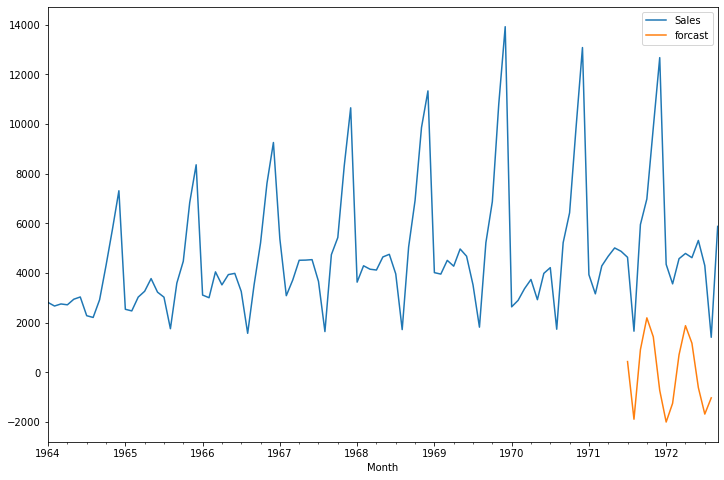

In [57]:
df['forcast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forcast']].plot(figsize=(12,8))

## Constructing the seasonal ARIMA model

In [58]:
import statsmodels.api as sm

In [59]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(4,1,4), seasonal_order=(4,1,4,12))
results = model.fit()

C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\podug\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\podug\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


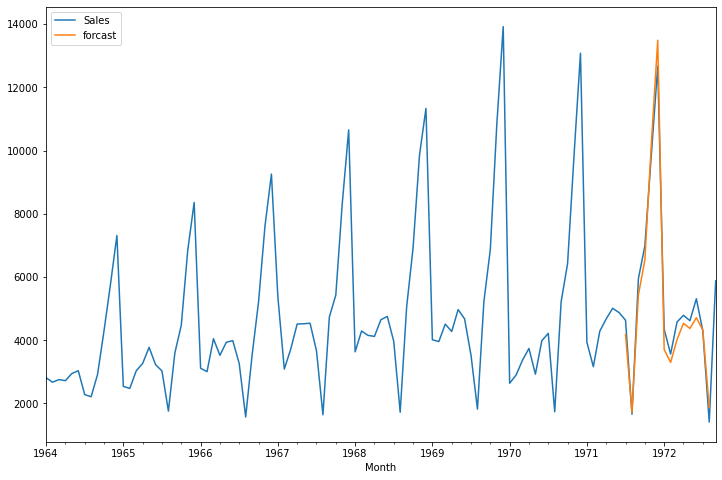

In [60]:
df['forcast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forcast']].plot(figsize=(12,8))

### Predicting the future

In [61]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [62]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forcast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [64]:
future_df = pd.concat([df, future_dates_df])
future_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forcast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [65]:
future_df.shape

(128, 4)

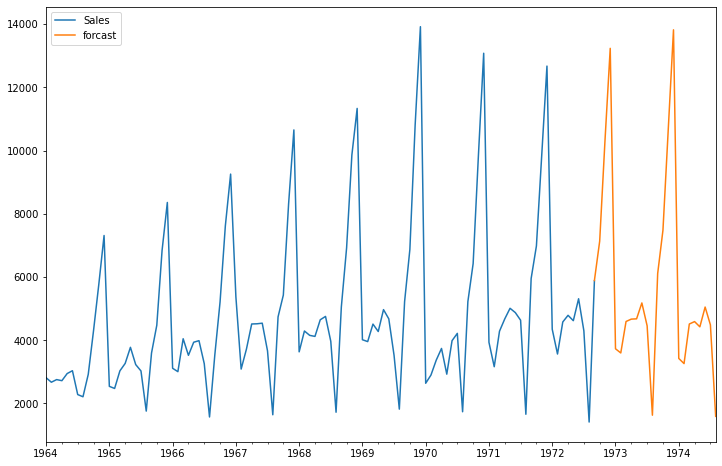

In [66]:
future_df['forcast'] = results.predict(start=104, end=128, dynamic=True)
future_df[['Sales', 'forcast']].plot(figsize=(12,8))